In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data via pandas read_csv function and understanding the structure and variables.
df = pd.read_csv('/content/ev_charging_patterns.csv', index_col = 'User ID')
df.head(4)

,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
User ID,,,,,,,,,,,,,,,,,,,
User_1,BMW i3,108.463007,Station_391,Houston,01-01-2024 00:00,01-01-2024 00:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01-01-2024 01:00,01-01-2024 03:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01-01-2024 02:00,01-01-2024 04:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
User_4,Hyundai Kona,50.000000,Station_327,Houston,01-01-2024 03:00,01-01-2024 06:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler


In [ ]:
# Understanding the distribution of data and looking for outliers or any anomalies like null values.
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


For almost every variable:
1. Mean and 50% values are close
2. Most values are within the 3 times of standard deviation range.
3. Some inconsistency in 'count' of values is observed due to null values.

The distribution for all numeric variables seems to resemble the normal distribution.



In [ ]:
#Checking for null values
df.isnull().sum()

,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66
Charging Cost (USD),0


In [ ]:
''' Checking in how many distinct rows do null values exist.'''
df.isna().any(axis=1).sum()

189

The null values across the parameters occur in different rows. If we choose to drop the null values, we would loose total 189 rows of data which accounts for 14% of total data. Observing that null values only occur in numeric columns we will replace it with mean of that column so, we don't have to drop a significant portion of the data.

In [ ]:
''' Replacing the null values with mean of the column. '''

for i, cols in enumerate(df.columns):
  if cols in ['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']:
    df[cols] = df[cols].fillna(df[cols].mean())
  else:
    continue

In [ ]:
''' Now the count of all variables is same'''
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,21.843792,1.061037,13.656279,10.751494,24.074134,17.080580,83.825619,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,24.868084,1.397623,14.431294,13.368141,27.786903,62.053266,81.931571,2.800664,2.000000
50%,75.000000,42.642894,2.258136,25.963003,22.076360,48.241771,75.682496,153.596788,14.630846,4.000000
75%,85.000000,60.545496,3.112806,36.955838,31.646044,69.277921,88.201370,221.962330,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


Dropping the columns 'Charging Station ID', 'Charging Start Time' and 'Charging End Time' because they have too many unique values so, we won't be able to do one hot encoding on it. Moreover, the first variable doesn't contribute much to the data in terms of a trend or distribution. As for later two, they are not needed as we have alternative columns to show charging time trends.

In [ ]:
df = df.drop(['Charging Station ID', 'Charging Start Time', 'Charging End Time'], axis=1)

To find the correlation between the variables, we first need to convert the categorical variables into numeric ones by one hot encoding method.

In [ ]:
''' To be able to see entire correlation matrix.'''

pd.set_option("display.max_columns", None)

In [ ]:
''' drop_first method in this function ensures that for one column with N distinct categories, we encode it to N-1 values only.'''

df_encod = pd.get_dummies(df, drop_first = True)

''' printing correlation matrix and saving it into another dataframe as well to make finding strong correlation easier.'''

corr_mat = df_encod.corr()
df_encod.corr()


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco,Time of Day_Evening,Time of Day_Morning,Time of Day_Night,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Charger Type_Level 1,Charger Type_Level 2,User Type_Commuter,User Type_Long-Distance Traveler
Battery Capacity (kWh),1.000000,0.000316,-0.024824,0.015552,-0.000492,-0.072148,-0.011512,-0.040069,-0.036411,0.037673,-0.014965,0.020972,-0.040806,-0.018464,-0.019599,0.010613,0.037707,0.033006,0.032548,0.016271,-0.027038,0.007902,-0.004130,0.019626,0.008664,-0.014417,0.020267,0.012108,-0.001796,0.009218,-0.014165
Energy Consumed (kWh),0.000316,1.000000,0.027770,-0.040284,-0.007608,-0.013153,0.000579,-0.026369,-0.017999,0.016727,-0.040577,0.004125,-0.002970,0.042178,0.032251,-0.028830,-0.008843,-0.010470,0.015618,-0.017804,-0.014665,-0.018135,-0.008100,0.006026,-0.004046,-0.017914,0.033907,-0.032940,0.074079,-0.042261,-0.009695
Charging Duration (hours),-0.024824,0.027770,1.000000,-0.013078,0.015902,-0.026016,0.006958,0.023094,-0.049575,0.001111,0.084768,0.001281,-0.054943,0.006220,0.003678,-0.013158,-0.034760,0.061577,-0.009616,-0.021336,0.050562,-0.028431,-0.024230,-0.060085,0.044018,0.039032,0.002616,-0.018244,0.009248,0.025339,-0.035206
Charging Rate (kW),0.015552,-0.040284,-0.013078,1.000000,-0.000831,-0.018711,-0.018247,0.030551,0.012465,-0.049195,-0.035004,0.016006,0.023045,-0.023212,0.026343,-0.020854,0.007797,-0.002012,-0.011762,0.042012,-0.014142,-0.030456,-0.009814,0.034630,0.008088,0.002069,-0.037480,0.001886,0.017854,0.050738,-0.037230
Charging Cost (USD),-0.000492,-0.007608,0.015902,-0.000831,1.000000,-0.008653,-0.063174,-0.008325,0.059864,-0.006487,-0.013101,0.041355,0.050843,0.001368,-0.021162,-0.000497,-0.002198,-0.025889,-0.009703,-0.007453,-0.012393,-0.007085,-0.028772,-0.022605,0.059044,-0.043297,0.027409,-0.060721,-0.006427,0.014027,-0.022044
State of Charge (Start %),-0.072148,-0.013153,-0.026016,-0.018711,-0.008653,1.000000,-0.021410,-0.023023,0.037751,0.016635,0.006033,0.028989,-0.020232,-0.028386,0.013747,0.047433,-0.001565,-0.038068,-0.039932,0.025056,0.003159,0.003395,-0.021473,0.002438,0.022391,0.022084,0.007871,0.031706,-0.017769,0.020893,0.024344
State of Charge (End %),-0.011512,0.000579,0.006958,-0.018247,-0.063174,-0.021410,1.000000,0.024944,0.022027,0.015671,-0.033700,0.007699,0.027239,-0.005957,-0.003366,-0.048289,0.044312,0.020861,-0.010488,-0.013326,0.029840,-0.032817,0.084987,0.010366,-0.048482,0.035103,-0.034995,0.006631,-0.022819,0.034269,-0.060313
Distance Driven (since last charge) (km),-0.040069,-0.026369,0.023094,0.030551,-0.008325,-0.023023,0.024944,1.000000,-0.023107,-0.030835,0.016740,0.043724,-0.043878,0.018346,-0.038804,-0.026058,0.050170,0.035894,-0.003995,0.001630,-0.035701,0.013076,0.009756,0.028933,-0.015175,0.005879,-0.035778,0.007185,-0.043631,0.047292,0.008700
Temperature (°C),-0.036411,-0.017999,-0.049575,0.012465,0.059864,0.037751,0.022027,-0.023107,1.000000,0.026410,-0.010664,0.032848,-0.001312,0.000466,0.009518,-0.023667,0.008188,0.042261,0.014668,-0.000069,-0.039774,-0.019657,-0.008535,0.031906,0.028218,-0.015744,-0.040913,0.005470,0.006684,0.023104,-0.046820
Vehicle Age (years),0.037673,0.016727,0.001111,-0.049195,-0.006487,0.016635,0.015671,-0.030835,0.026410,1.000000,0.002539,-0.046216,-0.003972,0.010788,-0.003473,-0.007675,0.032137,-0.021740,-0.002877,0.000070,0.016739,-0.033174,-0.022087,0.016668,0.021798,0.035053,0.016224,-0.000441,-0.016743,0.007581,-0.000493


In [ ]:
''' Checking for correaltions, for this dataset very weak correlation exists between values. The correlation is in order
    of 0.08, which is the highest. '''

filtered_corr = corr_mat[(corr_mat > 0.08) & (corr_mat != 1)]
filter_stack = filtered_corr.stack()
filter_stack

,,0
Charging Duration (hours),Vehicle Model_Chevy Bolt,0.084768
State of Charge (End %),Day of Week_Saturday,0.084987
Vehicle Model_Chevy Bolt,Charging Duration (hours),0.084768
Charging Station Location_Los Angeles,Day of Week_Monday,0.085577
Day of Week_Monday,Charging Station Location_Los Angeles,0.085577
Day of Week_Saturday,State of Charge (End %),0.084987


In [ ]:
''' Pairplot helps us to have a visual look at what relationship exists between the attributes of our data.'''

sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
''' Making a stacked bar chart to study the charging time required for different car models on average and how it
    varies according to the time of the day as per user habits. '''

def stacked_bar(df):

  df_pivot = df.pivot_table(index = 'Vehicle Model', columns = 'Charger Type', values = 'Charging Duration (hours)',
                            aggfunc = 'sum')

  plt.figure(dpi = 144)

  df_pivot.plot(kind = 'bar', stacked = True, figsize = (10, 7))

  plt.ylabel('Charging Time (hours)')
  plt.xlabel('Car Model')
  plt.title('Charging Duration relation by car model and charger type')
  plt.xticks(rotation=45)

  plt.legend(title='Charger type', loc = 'best', fontsize = 8)

  plt.grid(True, linewidth = 0.35)

  plt.show()

  return

<Figure size 921.6x691.2 with 0 Axes>

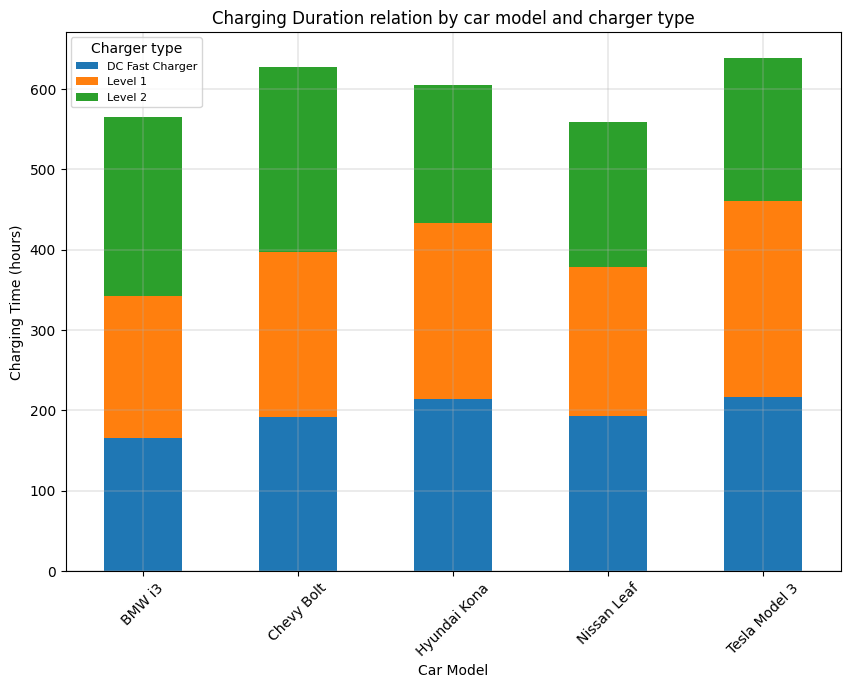

In [ ]:
stacked_bar(df)

In [ ]:
''' Creating a scatter plot between Charging rate and Temperature to study their relationship.  '''

def scatter_plot (df):

  plt.figure(dpi = 144)

  sns.jointplot(x = df['Charging Rate (kW)'], y = df['Temperature (°C)'], marginal_ticks=True, color = 'Green')

  plt.ylabel('Temperature (°C)')
  plt.xlabel('Charging Rate (kW)')
  plt.title('Temperature variation as per Charging rate', y = 1.25, loc = 'center')


  plt.show()


<Figure size 921.6x691.2 with 0 Axes>

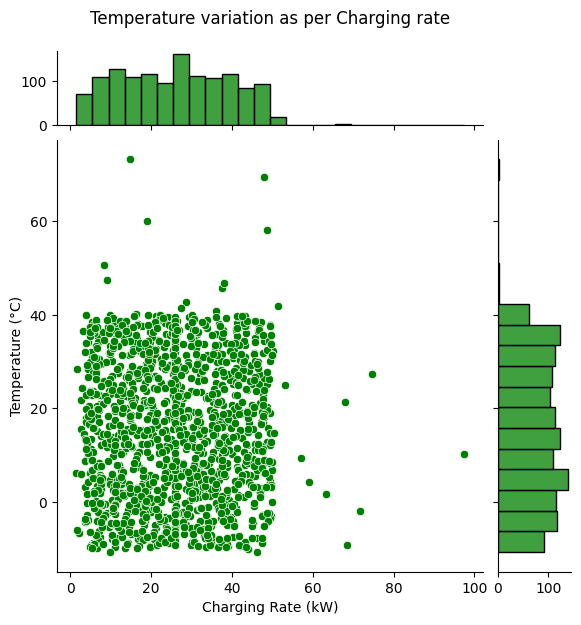

In [ ]:
scatter_plot(df)

In [ ]:
''' Making a heatmap to study the pattern between Charging duration and Day of the week.'''

def boxplot(df):

  plt.figure(dpi = 144)

  sns.boxplot(data = df, x = 'Day of Week', y = 'Charging Duration (hours)', fill = False,
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

  plt.xticks(rotation = 45)

  plt.grid(True)

  plt.title('Charging time across the week')

  plt.show()

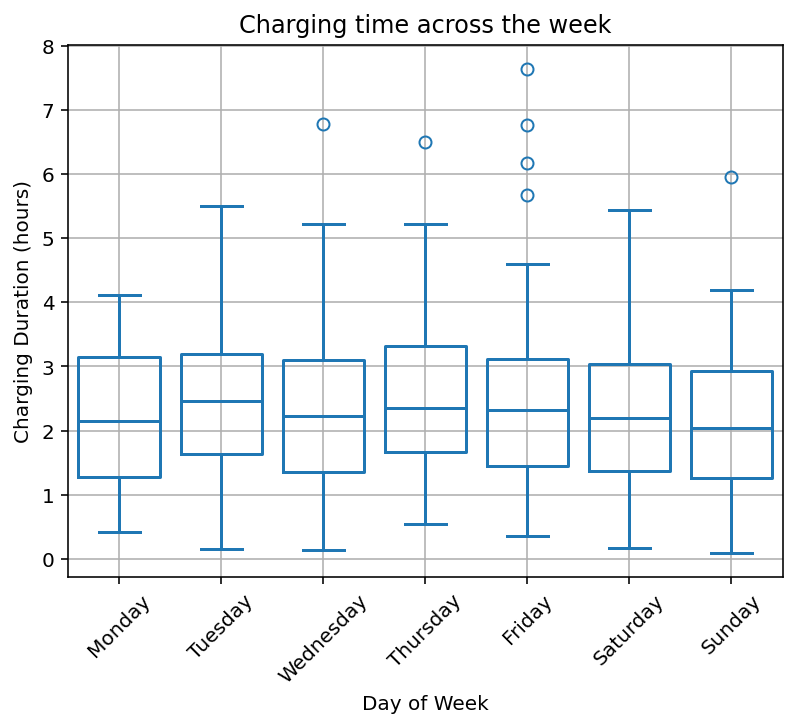

In [ ]:
boxplot(df)

In [ ]:
''' Taking a look at the distribution of Users. '''

def pie_chart(df):

  plt.figure(dpi = 144)

  explode = [0.025, 0.025, 0.025]
  labels = pd.unique(df['User Type'])

  plt.pie(df['User Type'].value_counts(), explode = explode, autopct = '%1.1f%%', labels = labels)
  plt.title('Driver Distribution')

  plt.show()

  return

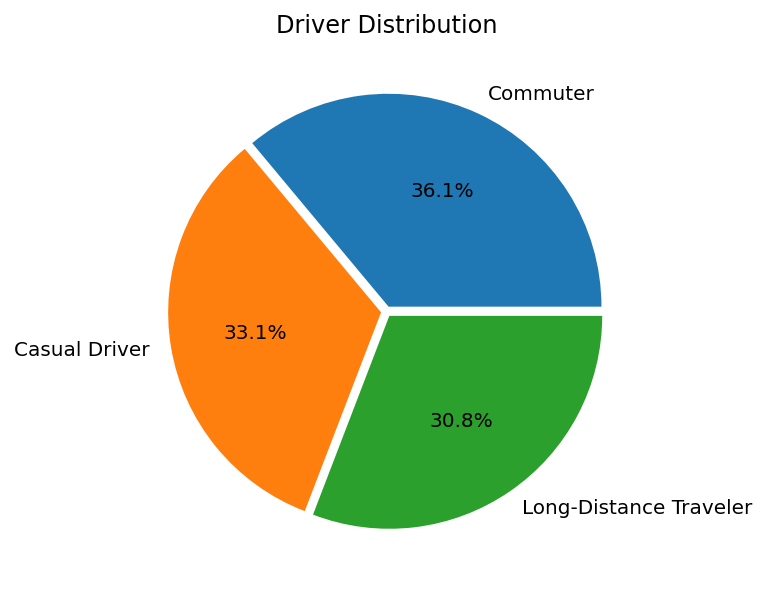

In [ ]:
pie_chart(df)